## Pre-processing batches of low-resolution images for super-resolution training

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from shutil import copy2

In [2]:
# Path to data

img_path = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images'
destin_img_path_low = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images-low-res-64'
destin_img_path_ref = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images-128'

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [3]:
# Creating directories

if not os.path.exists(destin_img_path_low):
    os.mkdir(destin_img_path_low)

if not os.path.exists(destin_img_path_ref):
    os.mkdir(destin_img_path_ref)    
    
# Processing all images

for i in os.listdir(img_path):
        
    img_ref = load_image(os.path.join(img_path, i)) 
    #img_name_low = os.path.splitext(i)[0] + '_low' + os.path.splitext(i)[1]

    resized_img_low = cv2.resize(img_ref, (64,64), interpolation=cv2.INTER_AREA)
    resized_img_ref = cv2.resize(img_ref, (128,128), interpolation=cv2.INTER_AREA)

    # Write original and lossy versions of images
    cv2.imwrite(os.path.join(destin_img_path_low, i), resized_img_low[...,::-1])
    #cv2.imwrite(os.path.join(destin_img_path_ref, i), resized_img_ref[...,::-1])

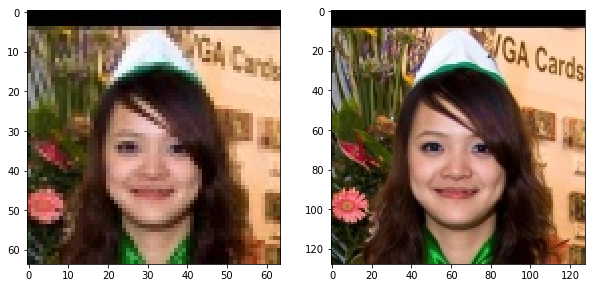

In [4]:
ref = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images-low-res-64\\AFW_1051618982_1.jpg'
low = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images-128\\AFW_1051618982_1.jpg'

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(load_image(ref))
plt.subplot(1,2,2)
plt.imshow(load_image(low))
plt.show()